In [2]:
import matplotlib.pylab as plt
import numpy as np
from sympy import *
import pandas as pd
from scipy import stats
from scipy.integrate import quad

In [3]:
init_printing()

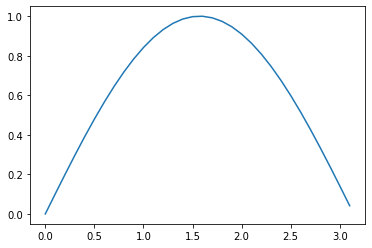

In [4]:
t = np.arange(0,np.pi,0.1)
f = lambda x: np.sin(x)
y = f(t)

plt.plot(t,y)

In [5]:
quad(f,0,np.pi)

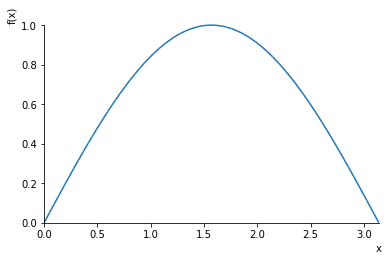

In [9]:
var("x,t")
plot(sin(x),(x,0,pi))

In [11]:
integrate(sin(x),(x,0,pi))

2.230530784048753


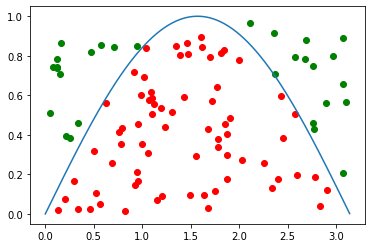

In [18]:
#integración por monte carlo
Num = 100
f = lambda x: np.sin(x)
a,b = 0,np.pi
Altura = 1

#puntos aleatorios en (X,Y)
#np.random.seed(10) #aquí nosotros definimos la semilla
x = np.random.uniform(a,b,Num)
y = np.random.uniform(a,Altura,Num)

#puntos para graficar la función
x_graf = np.arange(a,b,0.01)
fx = f(x)

plt.plot(x[y>fx],y[y>fx],"go")
plt.plot(x[y<fx],y[y<fx],"ro")
plt.plot(x_graf,f(x_graf))

#integración por montecarlo
N_0 = len(x[y<fx])
Base = b-a
yest = N_0/Num*(Base*Altura)
print(yest)

In [21]:
Num = 100000
f = lambda x: np.sin(x)
a,b = 0,np.pi
Altura = 1

#puntos aleatorios en (X,Y)
#np.random.seed(10) #aquí nosotros definimos la semilla
x = np.random.uniform(a,b,Num)
y = np.random.uniform(a,Altura,Num)

#integración por montecarlo
fx = f(x)
N_0 = len(x[y<fx])
Base = b-a
yest = N_0/Num*(Base*Altura)
print(yest)

2.0032679714880675


3.208


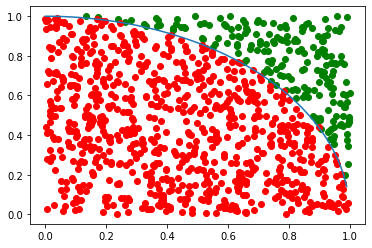

In [25]:
#integración por monte carlo
Num = 1000
f = lambda x: np.sqrt(-x**2 + 1)
a,b = 0,1
Altura = 1

#puntos aleatorios en (X,Y)
#np.random.seed(10) #aquí nosotros definimos la semilla
x = np.random.uniform(a,b,Num)
y = np.random.uniform(a,Altura,Num)

#puntos para graficar la función
x_graf = np.arange(a,b,0.01)
fx = f(x)

plt.plot(x[y>fx],y[y>fx],"go")
plt.plot(x[y<fx],y[y<fx],"ro")
plt.plot(x_graf,f(x_graf))

#integración por montecarlo
N_0 = len(x[y<fx])
Base = b-a
yest = N_0/Num*(Base*Altura)
print(yest*4)

In [33]:
Num = 10000000
f = lambda x: np.sqrt(-x**2 + 1)
a,b = 0,1
Altura = 1

#puntos aleatorios en (X,Y)
#np.random.seed(10) #aquí nosotros definimos la semilla
x = np.random.uniform(a,b,Num)
y = np.random.uniform(a,Altura,Num)

fx = f(x)

#integración por montecarlo
N_0 = len(x[y<fx])
Base = b-a
yest = N_0/Num*(Base*Altura)
print(yest*4)

3.1412748


In [31]:
#otra manera sería
yest = sum(fx)/Num*(Base*Altura)
print(yest*4)

3.141380699839979


21.488493750554188


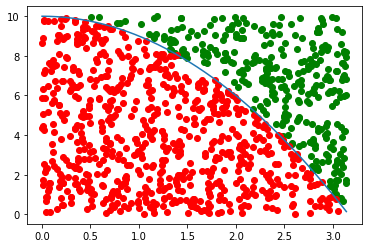

In [39]:
#integración por monte carlo
Num = 1000
f = lambda x: -x**2 + 10
a,b = 0,np.pi
Altura = 10

#puntos aleatorios en (X,Y)
#np.random.seed(10) #aquí nosotros definimos la semilla
x = np.random.uniform(a,b,Num)
y = np.random.uniform(a,Altura,Num)

#puntos para graficar la función
x_graf = np.arange(a,b,0.01)
fx = f(x)

plt.plot(x[y>fx],y[y>fx],"go")
plt.plot(x[y<fx],y[y<fx],"ro")
plt.plot(x_graf,f(x_graf))

#integración por montecarlo
N_0 = len(x[y<fx])
Base = b-a
yest = N_0/Num*(Base*Altura)
print(yest)

In [42]:
Dado1 = np.arange(1,7)
Dado2 = np.arange(1,7)

df = pd.DataFrame(index=np.arange(1,7),
                 columns=["Dado1","Dado2","Probabilidad","Ganancia"],
                 dtype=float)
df.index.name = "Evento"
df["Dado1"] = Dado1
df["Dado2"] = Dado2
df["Ganancia"] = Dado1*Dado2*100
df["Probabilidad"] = 1/36
df

,Dado1,Dado2,Probabilidad,Ganancia
Evento,,,,
1,1,1,0.027778,100
2,2,2,0.027778,400
3,3,3,0.027778,900
4,4,4,0.027778,1600
5,5,5,0.027778,2500
6,6,6,0.027778,3600


In [43]:
#Probabilidad de ganas y la ganancia maz seria 36000
df.Probabilidad.sum()

In [44]:
#probabilidad de perder y por cada vez que pierdo son 200
1-df.Probabilidad.sum()

In [46]:
#si juego este juego en ocasiones repetidas yo espero ganar
sum(df["Probabilidad"]*df["Ganancia"])+(1-df.Probabilidad.sum())*-200

In [47]:
Ganancia = 0

In [50]:
Dado1 = 1
Dado2 = 4

if Dado1 == Dado2:
    Ganancia += 100 *(Dado1+Dado2)
else:
    Ganancia -= 200
Ganancia

In [54]:
def Juego1(Dado1,Dado2):
    if Dado1 == Dado2:
        return 100*(Dado1*Dado2)
    else:
        return -200

Dado1 = np.random.randint(1,7)
Dado2 = np.random.randint(1,7)
Juego1(Dado1,Dado2)

In [68]:
N = 20
SimularJuego1 = np.zeros(N)

for i,j in enumerate (SimularJuego1):
    Dado1 = np.random.randint(1,7)
    Dado2 = np.random.randint(1,7)
    SimularJuego1[i] = Juego1(Dado1,Dado2)

print(np.mean(SimularJuego1))

410.0


1600000


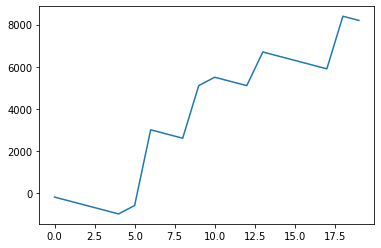

In [69]:
plt.plot(np.cumsum(SimularJuego1))
print(20000*80)

In [ ]:
N=1000
win = 70
lose = -200

Dados = np.random.randint(1,7,[N,2])